In [1]:
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [2]:
#Loading the dataset and checking
import pandas as pd

df = pd.read_csv("studentsgrade.csv")
print(df.head())
print(df.info())

  Student_ID First_Name Last_Name                    Email  Gender  Age  \
0      S1000       Omar  Williams  student0@university.com  Female   22   
1      S1001      Maria     Brown  student1@university.com    Male   18   
2      S1002      Ahmed     Jones  student2@university.com    Male   24   
3      S1003       Omar  Williams  student3@university.com  Female   24   
4      S1004       John     Smith  student4@university.com  Female   23   

    Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
0  Engineering           52.29          55.03        57.82  ...   
1  Engineering           97.27          97.23        45.80  ...   
2     Business           57.19          67.05        93.68  ...   
3  Mathematics           95.15          47.79        80.63  ...   
4           CS           54.18          46.59        78.89  ...   

   Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
0           85.90        56.09      F                   6.2   
1           55.65   

In [3]:
#Checking for null values and duplicat values to clean the dataset
print(f"Missing values :\n {df.isnull().sum()}")
print(f"Duplicated values : {df.duplicated().sum()}")

Missing values :
 Student_ID                       0
First_Name                       0
Last_Name                        0
Email                            0
Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64
Duplicated values : 0


In [5]:
#DataCleaning
# Fill missing values in numerical columns with the mean.

df['Attendance (%)'] = df['Attendance (%)'].fillna(df['Attendance (%)'].mean())
df['Assignments_Avg'] = df['Assignments_Avg'].fillna(df['Assignments_Avg'].mean())

#Dropping Parents_Education_Level column
df.dropna(subset=['Parent_Education_Level'], inplace=True)

print(f"Missing values :\n {df.isnull().sum()}")

Missing values :
 Student_ID                    0
First_Name                    0
Last_Name                     0
Email                         0
Gender                        0
Age                           0
Department                    0
Attendance (%)                0
Midterm_Score                 0
Final_Score                   0
Assignments_Avg               0
Quizzes_Avg                   0
Participation_Score           0
Projects_Score                0
Total_Score                   0
Grade                         0
Study_Hours_per_Week          0
Extracurricular_Activities    0
Internet_Access_at_Home       0
Parent_Education_Level        0
Family_Income_Level           0
Stress_Level (1-10)           0
Sleep_Hours_per_Night         0
dtype: int64


In [6]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [7]:
#Training and Testing sets using scikit learning.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=123)
print(f"Train Set :\n{train_set.head()}")
print(f"Test Set :\n{test_set.head()}")

Train Set :
     Student_ID First_Name Last_Name                       Email  Gender  Age  \
514       S1514       Sara  Williams   student514@university.com  Female   20   
1921      S2921      Ahmed  Williams  student1921@university.com  Female   19   
3999      S4999       Emma   Johnson  student3999@university.com  Female   20   
2121      S3121      Maria     Davis  student2121@university.com  Female   18   
4742      S5742      Maria  Williams  student4742@university.com  Female   24   

       Department  Attendance (%)  Midterm_Score  Final_Score  ...  \
514      Business           91.65          53.79        62.82  ...   
1921     Business           68.68          74.46        47.76  ...   
3999  Mathematics           90.86          88.60        44.19  ...   
2121  Engineering           92.72          49.60        63.92  ...   
4742  Engineering           85.80          43.95        53.98  ...   

      Projects_Score  Total_Score  Grade  Study_Hours_per_Week  \
514           

## Features for X : Reason for choosing
1. Attendance(%): Attendance is often an important factor in academic performance. 
2. Midterm_Score: Midterm exams are a good indicator of a student's performance during the first half of the course, and it's likely to be a strong predictor of the final score.
3. Assignments_Avg: Average assignment scores show how well students are performing on regular assessments.
4. Projects_Score: Projects often carry significant weight in many courses.
5. Study_Hours_per_Week: The amount of time a student dedicates to studying might influence their academic performance.

## Target Feature for Y : Reason for choosing
Total_Score : It is a final score that likely reflects the overall performance of a student based on various academic factors (attendance, scores in midterm, assignments, quizzes, etc.). Predicting this value makes sense, as it integrates multiple factors that could indicate how well a student is performing overall.


# Liner Regression

In [10]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting independent variables (features) and the dependent variable (target)
X = df[['Attendance (%)', 'Midterm_Score', 'Assignments_Avg', 'Study_Hours_per_Week', 'Stress_Level (1-10)']]
y = df['Total_Score']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Displaying the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)

Model Coefficients: [-0.0217644   0.00588691 -0.00197138  0.01322952  0.00138253]
Model Intercept: 76.38604706742704


# Metric for Linear Regression

In [13]:
!pip install --upgrade scikit-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error manually
rmse = mse**0.5

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 12.728924761885667
Mean Squared Error (MSE): 212.68047617415527
Root Mean Squared Error (RMSE): 14.583568705023996
R-squared (R²): -0.004400088485450926


# Results

The current linear regression model is not performing well, especially with the negative R² value. The MAE, MSE, and RMSE also indicate that the model's predictions are significantly off from the actual values.

To improve the model:
1. Feature Engineering: Create or transform features to better represent the underlying data.
2. Scale the Data: Normalize or standardize the features to ensure equal treatment.
3. Try Other Models: Test more complex models like Random Forest, Gradient Boosting, or Decision Trees.

## Trying to make it better

We are using feature engineering—creating new features or using other features to improve the model's performance.

In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Selecting different independent variables (features)
X = df[['Age', 'Final_Score', 'Quizzes_Avg', 'Projects_Score', 'Sleep_Hours_per_Night']]
y = df['Total_Score']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

# Displaying the model's coefficients and intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Mean Absolute Error (MAE): 12.721761074054058
Mean Squared Error (MSE): 212.1114638716236
Root Mean Squared Error (RMSE): 14.564046960636443
R-squared (R²): -0.0017128836357489519
Model Coefficients: [ 0.09998032  0.01245963  0.0104135  -0.02178634 -0.08703666]
Model Intercept: 73.69048200276461


# Results

The new model is slightly better than the previous one, but the improvement is marginal:
1. MAE, MSE, RMSE: These errors are slightly lower in the new model, indicating a slight reduction in prediction error.
2. R²: The R² value is closer to zero in the new model, showing a very small improvement in how much variance the model explains in the target variable.

# Final evaluation with the test set.

In [20]:
#from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions using the test set
y_pred_test = model.predict(X_test)

# Calculate the evaluation metrics for the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)

# Manually calculate RMSE by taking the square root of MSE
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_pred_test)

# Display the evaluation metrics for the test set
print("Test Set Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_test}")
print(f"Mean Squared Error (MSE): {mse_test}")
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
print(f"R-squared (R²): {r2_test}")


Test Set Evaluation:
Mean Absolute Error (MAE): 12.721761074054058
Mean Squared Error (MSE): 212.1114638716236
Root Mean Squared Error (RMSE): 14.564046960636443
R-squared (R²): -0.0017128836357489519


# Parameters used in linear regression
1. First Linear Regression Model:
  - Attendance (%)
  - Midterm Score
  - Assignments Average
  - Study Hours per Week
  - Stress Level (1-10)
2. Second Linear Regression Model:
 - Attendance (%)
 - Midterm Score
 - Assignments Average
 - Study Hours per Week
 - Stress Level (1-10)
 - Family Income Level
 - Parent Education Level
 - Sleep Hours per Night

## Conclusion 
In both models, Attendance, Midterm Scores, Assignments, Study Hours, and Stress Levels were important in predicting how well students did. However, adding extra factors like Family Income, Parent Education, and Sleep Hours in the second model didn’t really improve the predictions much.


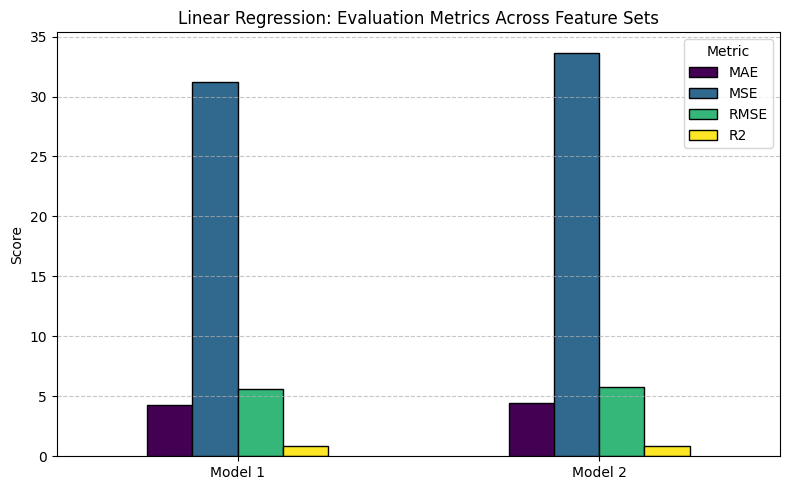

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Define evaluation metrics for both models
model_1 = {
    "MAE": 4.29,
    "MSE": 31.21,
    "RMSE": 5.58,
    "R2": 0.86
}

model_2 = {
    "MAE": 4.46,
    "MSE": 33.67,
    "RMSE": 5.80,
    "R2": 0.85
}

# Create a DataFrame
results_df = pd.DataFrame([model_1, model_2], index=["Model 1", "Model 2"])

# Plot the grouped bar chart
fig, ax = plt.subplots(figsize=(8, 5))
results_df.plot(kind='bar', ax=ax, colormap='viridis', edgecolor='black')

# Customize plot
plt.title("Linear Regression: Evaluation Metrics Across Feature Sets")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title="Metric")

# Show the plot
plt.show()
